## Data Preprocessing

In [90]:
import pandas as pd

In [91]:
df=pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Understanding the Data

In [92]:
df.shape

(891, 12)

In [93]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
# df=df.dropna(subset=["Cabin","Embarked"])


In [97]:
# df=df.dropna(subset=["Age"])
# df["Age"].astype(int)

In [98]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [99]:
df.duplicated().sum()

0

In [100]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## EDA (Univariate)

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Categorical -- Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Cabin, Embarked
Numerical -- Age, Fare

In [115]:
import seaborn as sns
import matplotlib as plt

### Categorical Data

##### Countplot

Survived
0    549
1    342
Name: count, dtype: int64

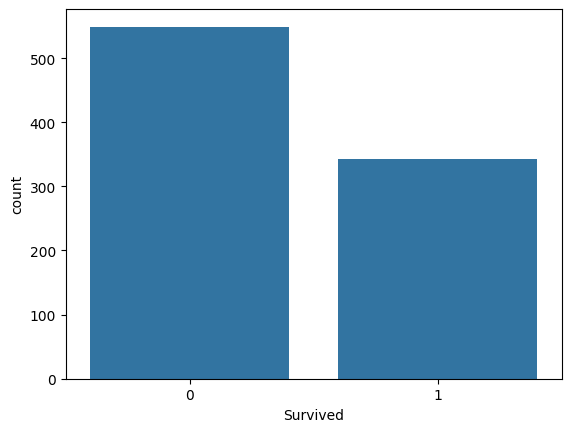

In [106]:
sns.countplot(x="Survived",data=df)
df['Survived'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

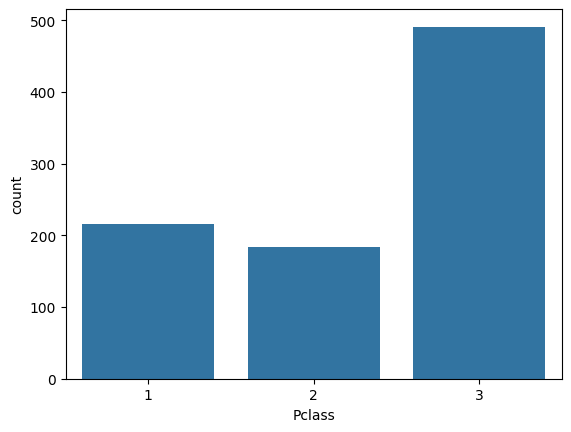

In [107]:
sns.countplot(x="Pclass",data=df)
df['Pclass'].value_counts()

<Axes: xlabel='Sex', ylabel='count'>

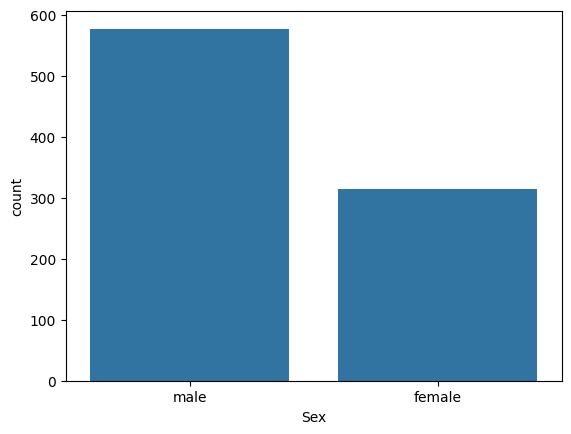

In [108]:
sns.countplot(x="Sex",data=df)

<Axes: xlabel='Embarked', ylabel='count'>

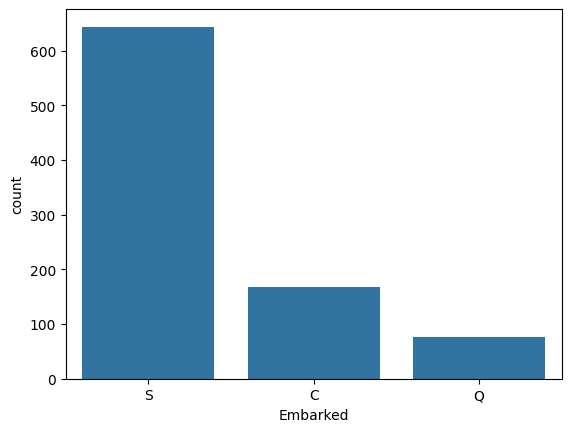

In [109]:
sns.countplot(x='Embarked',data=df)

##### PieChart

In [110]:
import matplotlib as plt

<Axes: ylabel='count'>

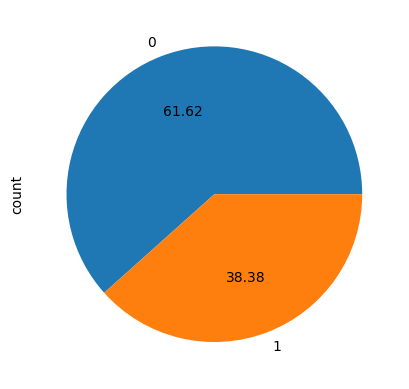

In [111]:
df["Survived"].value_counts().plot(kind="pie",autopct="%.2f")

<Axes: ylabel='count'>

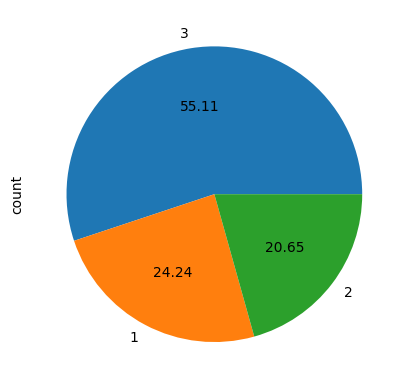

In [113]:
df["Pclass"].value_counts().plot(kind="pie",autopct="%.2f")

<Axes: ylabel='count'>

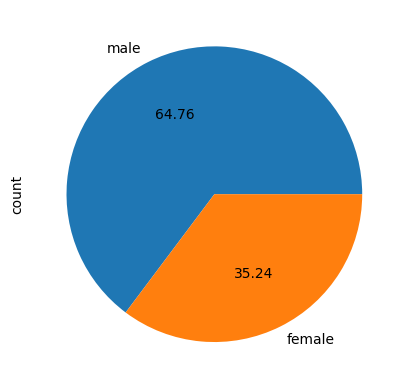

In [114]:
df["Sex"].value_counts().plot(kind="pie",autopct="%.2f")

### Numerical Data

##### Histogram

In [118]:
import matplotlib.pyplot as plt

(array([14., 10.,  0.,  6., 10.,  4.,  0.,  3.,  3.,  4.,  8.,  0.,  2.,
         4.,  1.,  2.,  0.,  7.,  5., 17., 13.,  0., 26., 25., 15., 25.,
         0., 27., 15., 31., 24.,  0., 18., 18., 25., 22.,  0., 27., 17.,
        18., 17.,  0., 16., 18., 22.,  7.,  0., 11., 14., 13.,  8.,  0.,
        13.,  5.,  9.,  0., 14.,  3.,  9.,  9.,  0.,  6., 10.,  7.,  6.,
         0.,  1.,  8.,  2.,  5.,  0.,  2.,  5.,  2.,  4.,  0.,  3.,  4.,
         2.,  2.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.42  ,  1.2158,  2.0116,  2.8074,  3.6032,  4.399 ,  5.1948,
         5.9906,  6.7864,  7.5822,  8.378 ,  9.1738,  9.9696, 10.7654,
        11.5612, 12.357 , 13.1528, 13.9486, 14.7444, 15.5402, 16.336 ,
        17.1318, 17.9276, 18.7234, 19.5192, 20.315 , 21.1108, 21.9066,
        22.7024, 23.4982, 24.294 , 25.0898, 25.8856, 26.6814, 27.4772,
        28.273 , 29.0688, 29.8646, 30.6604, 31.4562, 32.252 , 33.0478,
        

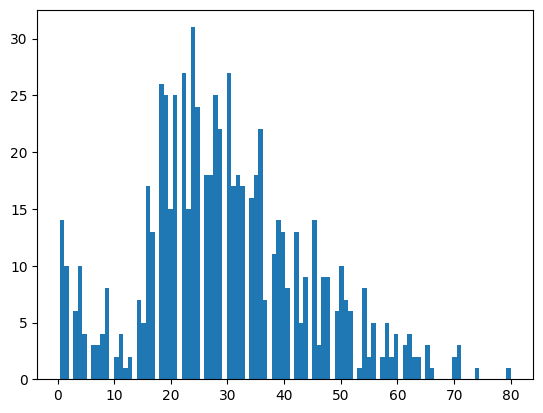

In [122]:
plt.hist(x="Age",data=df,bins=100)

##### Distplot

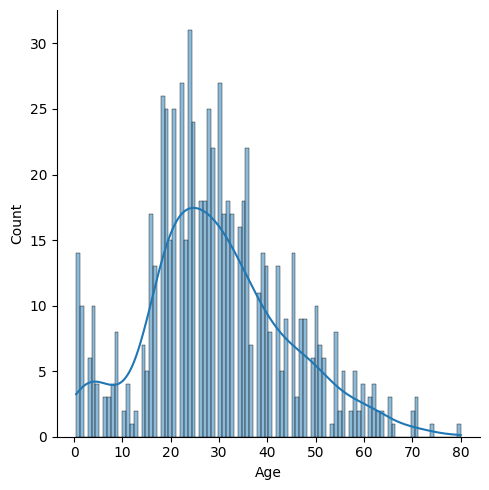

In [132]:
sns.displot(df["Age"],kde=True,bins=100)

##### Boxplot

<Axes: xlabel='Age'>

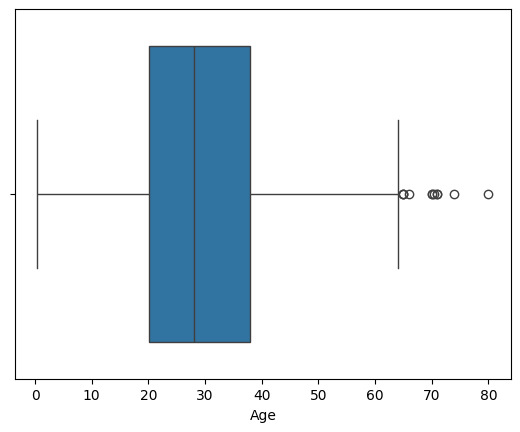

In [134]:
sns.boxplot(x="Age",data=df)

## EDA (Bivariate/Multivariate)

In [ ]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
titanic=pd.read_csv("Titanic.csv")

In [147]:
flights=sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [148]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Scatterplot (Num-Num)

In [154]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

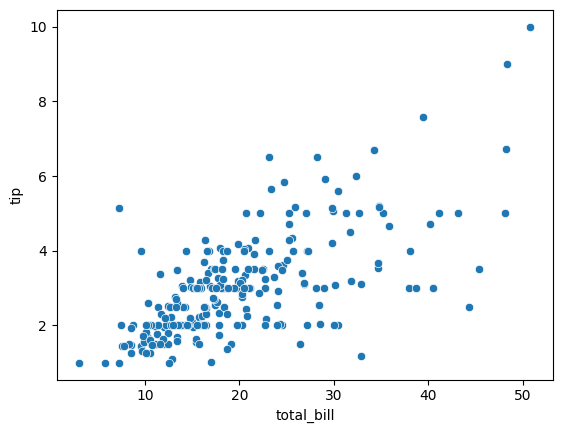

In [150]:
sns.scatterplot(x="total_bill",y="tip",data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

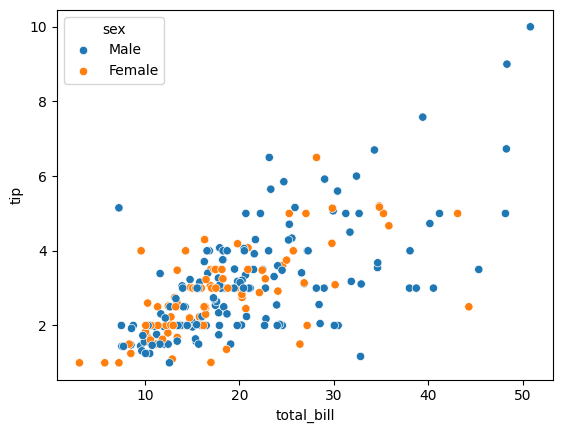

In [ ]:
sns.scatterplot(x="total_bill",y="tip",data=tips,hue=df["sex"])

<Axes: xlabel='total_bill', ylabel='tip'>

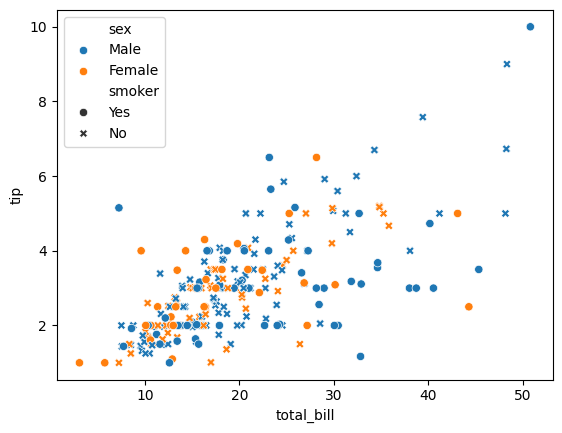

In [152]:
sns.scatterplot(x="total_bill",y="tip",data=tips,hue=df["sex"],style=df["smoker"])

<Axes: xlabel='total_bill', ylabel='tip'>

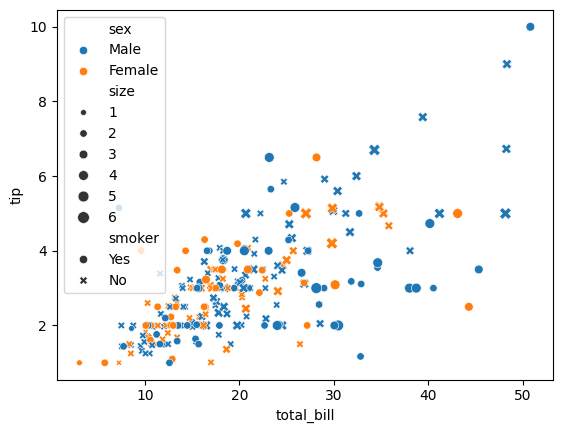

In [153]:
sns.scatterplot(x="total_bill",y="tip",data=tips,hue=df["sex"],style=df["smoker"],size=df["size"])

### Bar Plot (Numerical-Categorical)

In [155]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

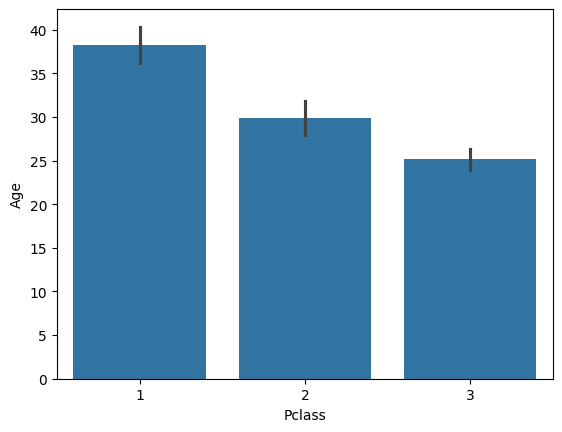

In [ ]:
sns.barplot(x="Pclass",y="Age",data=titanic)

<Axes: xlabel='Pclass', ylabel='Age'>

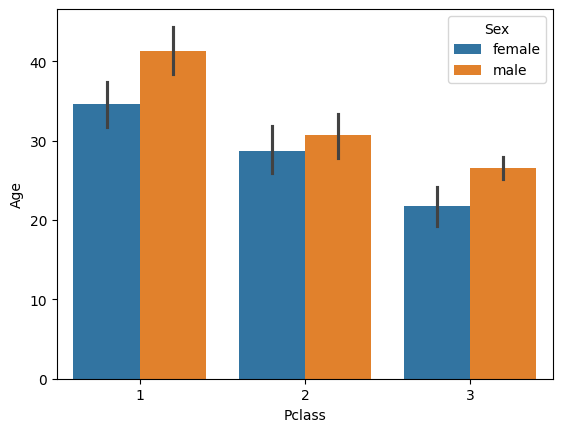

In [159]:
sns.barplot(x="Pclass",y="Age",data=titanic,hue=titanic["Sex"])

<Axes: xlabel='Pclass', ylabel='Fare'>

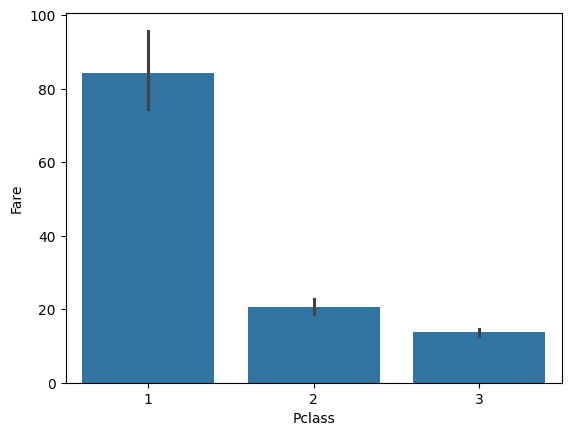

In [ ]:
sns.barplot(x="Pclass",y="Fare",data=titanic)

<Axes: xlabel='Pclass', ylabel='Fare'>

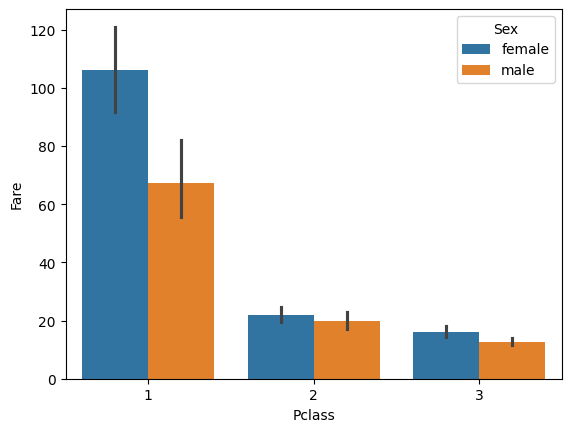

In [158]:
sns.barplot(x="Pclass",y="Fare",data=titanic,hue=titanic["Sex"])

### Box Plot (Num-Cat)

<Axes: xlabel='Sex', ylabel='Age'>

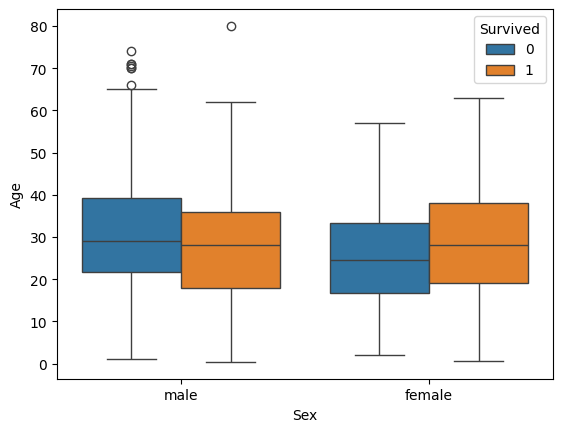

In [161]:
sns.boxplot(x="Sex",y="Age",data=titanic,hue=titanic["Survived"])

### Displot (Num-Cat)

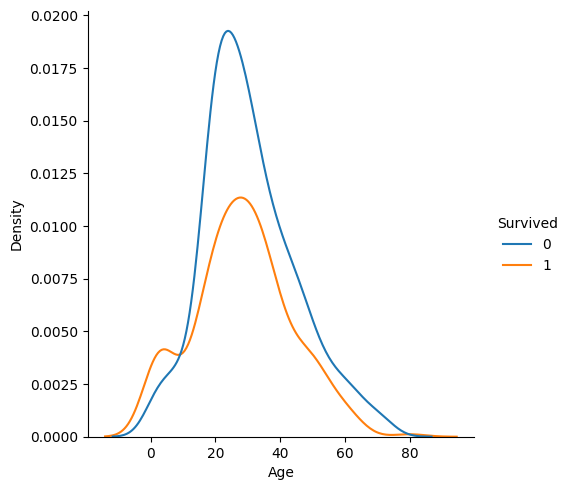

In [167]:
sns.displot(data=titanic, x="Age", hue="Survived", kind="kde",)

### HeatMap (Cat-Cat)

In [170]:
val=pd.crosstab(titanic['Pclass'],titanic['Survived'])

<Axes: xlabel='Survived', ylabel='Pclass'>

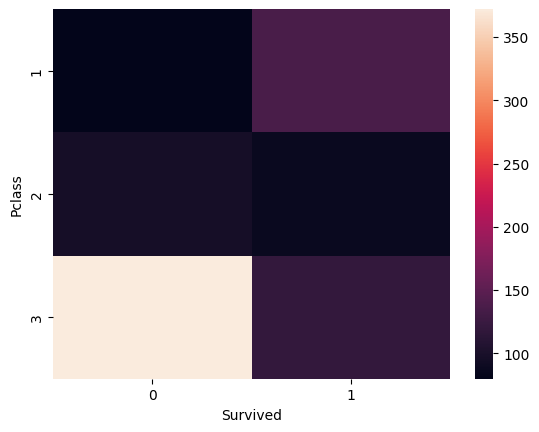

In [171]:
sns.heatmap(val)

In [177]:
(titanic.groupby("Pclass")["Survived"].mean()*100)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_19804\2230379170.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))


<Axes: xlabel='year', ylabel='month'>

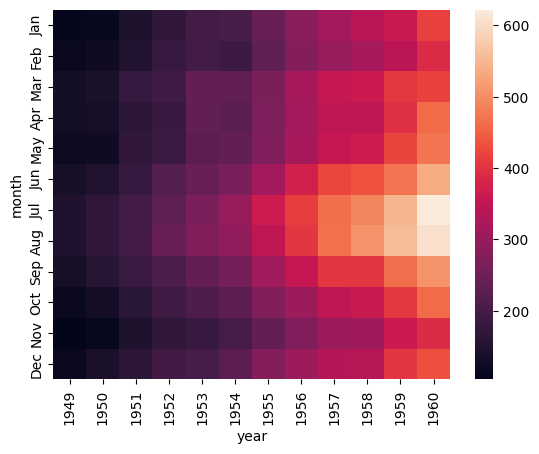

In [202]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))

### Clustermap (Cat-Cat)

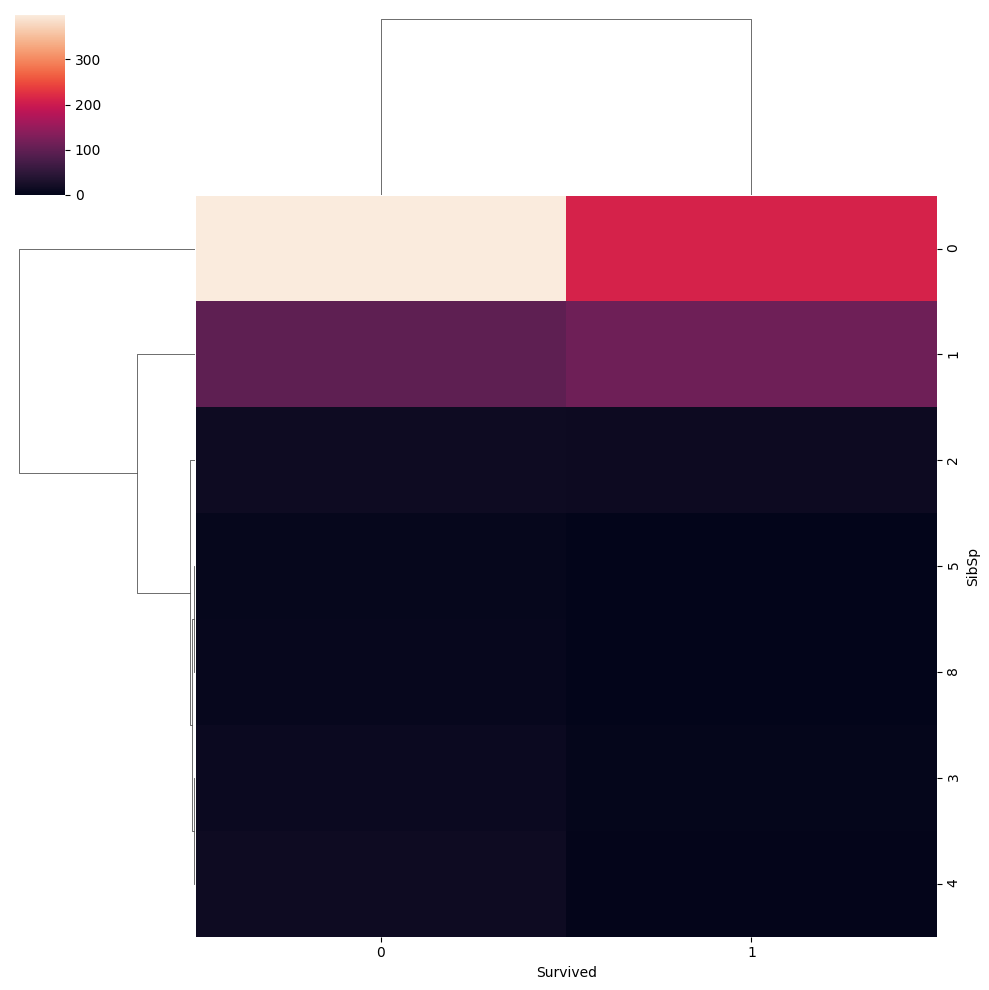

In [179]:
sns.clustermap(pd.crosstab(titanic["SibSp"],titanic["Survived"]))

### Pairplot

In [180]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


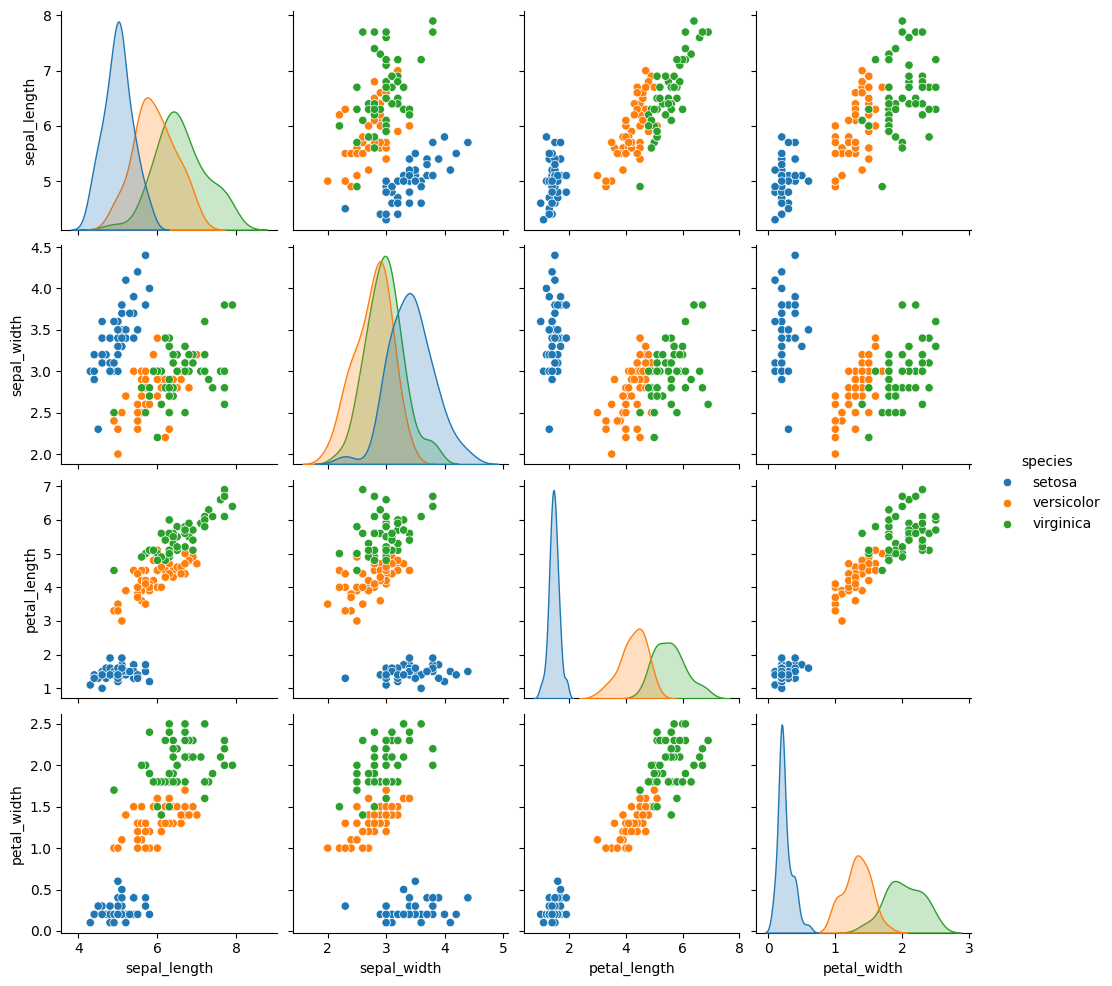

In [182]:
sns.pairplot(iris,hue="species")

### Lineplot (Num-Num)
for time based numbers

In [183]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [199]:
new=flights.groupby('year')['passengers'].sum().reset_index()

<Axes: xlabel='year', ylabel='passengers'>

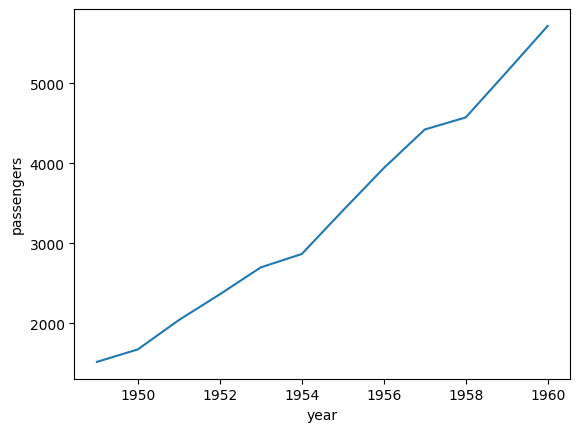

In [200]:
sns.lineplot(x='year',y='passengers',data=new)